In [10]:
!pip3 install selenium

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [13]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

# Set up Chrome options
chrome_options = Options()
# chrome_options.add_argument("--headless")  # Run in headless mode for no GUI
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Set up Chrome driver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    # Navigate to the TradingView earnings page
    driver.get("https://www.tradingview.com/markets/stocks-usa/earnings/")

    # Wait for the page to load (you might need to adjust the wait time)
    time.sleep(10)

    # Find the elements containing the earnings data
    # This might need adjustments based on the actual page structure
    elements = driver.find_elements(By.CSS_SELECTOR, '.tv-widget-earnings__item')
    print(elements)
    # Parse the data
    earnings_data = []
    for elem in elements:
        symbol = elem.find_element(By.CSS_SELECTOR, '.tv-widget-earnings__symbol').text
        date = elem.find_element(By.CSS_SELECTOR, '.tv-widget-earnings__date').text
        estimate = elem.find_element(By.CSS_SELECTOR, '.tv-widget-earnings__estimate').text
        actual = elem.find_element(By.CSS_SELECTOR, '.tv-widget-earnings__actual').text
        earnings_data.append([symbol, date, estimate, actual])

    # Create a DataFrame and save to CSV
    df = pd.DataFrame(earnings_data, columns=['Symbol', 'Date', 'Estimate', 'Actual'])

finally:
    # driver.quit()
    pass


[]


In [41]:
df = driver.find_elements(By.CLASS_NAME, 'tv-data-table__tbody')
for i in df:
    t = i.text
list_ = t.split("\n")
for i in list_: 
    if len(i) == 1: list_.remove(i)
stock_list = []
for i in range(0, len(list_), 3):
    stock_list.append(list_[i][:-1])

In [69]:
import yfinance as yf
df = yf.download(stock_list, start='2024-05-01')

[*********************100%***********************]  150 of 150 completed


In [70]:
close = df['Adj Close']
pct = close.pct_change(fill_method=None).dropna(how='all', axis=0)

In [71]:
close['AKTS']

Date
2024-05-01 00:00:00+00:00    0.600
2024-05-02 00:00:00+00:00    0.600
2024-05-03 00:00:00+00:00    0.600
2024-05-06 00:00:00+00:00    0.603
2024-05-07 00:00:00+00:00    0.597
                             ...  
2024-08-21 00:00:00+00:00    0.101
2024-08-22 00:00:00+00:00    0.094
2024-08-23 00:00:00+00:00    0.104
2024-08-26 00:00:00+00:00    0.097
2024-08-27 00:00:00+00:00    0.092
Name: AKTS, Length: 82, dtype: float64

In [73]:
final = pd.DataFrame(pct.max(axis=0))
final.columns = ['max']
final[(final['max'] >= 0.1) & (final['max'] <= 0.5)].sort_values(by='max', ascending=False)

,max
Ticker,
LTCH,0.500000
MAXN,0.489879
TSPH,0.477618
CREV,0.466775
PKDC,0.437500
...,...
PKBO,0.111111
PDCO,0.110722
FIVE,0.101960


<Axes: xlabel='Date'>

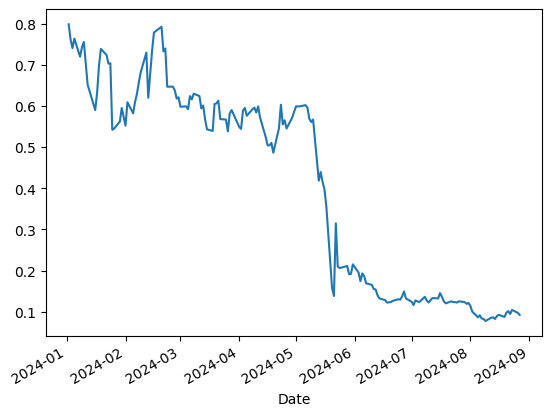

In [52]:
close['AKTS'].plot()